In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)


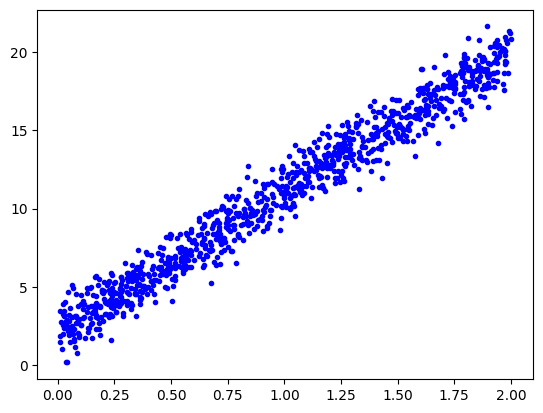

In [38]:
# simulera dataset
samples = 1000

X = 2*np.random.rand(samples, 1) 
y = 2+9*X+np.random.randn(samples, 1)

plt.plot(X, y, "b.")



In [39]:
X = np.c_[np.ones((samples, 1)), X]  # add x0 = 1 to each instance,

X[:5]

array([[1.        , 0.74908024],
       [1.        , 1.90142861],
       [1.        , 1.46398788],
       [1.        , 1.19731697],
       [1.        , 0.31203728]])

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)




# gradient descent

another way and more general way to train linear regression is bu using gradient descent, which is an iterative optimization approach, it works by taking a cost function e.g MSE,

here 0 are the parameters that is weights and bias or $\hat\beta$ when referred to last lecture

the main idea with gradient descent is to minize the cost function a number represeting the error between label and prediction through tatking small steps one at a time in the direction of the steepest descent, through multivariate calculus the steepest ascent is the gradient of the multivariate function so we take the negative direction of the gradient.

this is called batch gradient descent as it uses whole training batch which will be slow on large training set.


In [41]:
def gradient_descent(X, y, learning_rate=.1, iterations=1000):
    m = len(X)
    theta = np.random.randn(X.shape[1], 1)  # random initialization

    for _ in range(iterations):
        gradient = 2/m * X.T.dot(X.dot(theta) - y)
        theta -= learning_rate*gradient
    return theta

theta = gradient_descent(X_train, y_train)
theta

array([[2.20500716],
       [8.90206121]])

In [42]:
steps = range(1,200,1)
thetas = [gradient_descent(X_train, y_train, learning_rate=0.1, iterations=iteration).reshape(-1) for iteration in steps]
thetas = np.array(thetas)

thetas.shape

(199, 2)

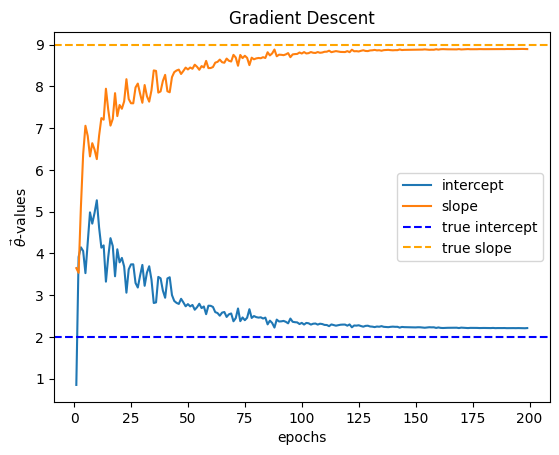

In [43]:
fig, ax = plt.figure(dpi=100), plt.axes()

ax.plot(steps, thetas, label=["intercept", "slope"])
ax.axhline(y=2, color='b', linestyle='--', label="true intercept")
ax.axhline(y=9, color="orange", linestyle='--', label="true slope")
ax.set(xlabel="epochs", ylabel=r"$\vec{\theta}$-values", title="Gradient Descent")
ax.legend()
plt.show()